In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import json_normalize

In [3]:
# adjust the path to your Apple Music - Play History Daily Tracks.csv file as necessary
df = pd.read_csv('Apple/non_health/Media Services/Media_Services/Apple Music - Play History Daily Tracks.csv',
                 encoding='utf8')

In [ ]:
df

In [4]:
df.columns

Index(['Country', 'Track Identifier', 'Media type', 'Date Played', 'Hours',
       'Play Duration Milliseconds', 'End Reason Type', 'Source Type',
       'Play Count', 'Skip Count', 'Ignore For Recommendations',
       'Track Reference', 'Track Description'],
      dtype='object')

In [ ]:
# NOTE: "Hours" = the range of hours the song was played on "Date Played"
# "Play Count" = the number of times the song was played on "Date Played"

In [11]:
df['Play Duration Minutes'] = df['Play Duration Milliseconds'] / (60 * 1000)

In [ ]:
df.sort_values(['Play Duration Minutes'], ascending=False)

In [8]:
df['End Reason Type'].value_counts()

NATURAL_END_OF_TRACK                         8929
TRACK_SKIPPED_FORWARDS                       3709
PLAYBACK_MANUALLY_PAUSED                      715
MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM     460
TRACK_SKIPPED_BACKWARDS                        78
OTHER                                          24
SCRUB_END                                       7
PLAYBACK_SUSPENDED                              4
EXITED_APPLICATION                              1
Name: End Reason Type, dtype: int64

In [ ]:
df[(df['End Reason Type'] == 'TRACK_SKIPPED_FORWARDS') |
   (df['End Reason Type'] == 'MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM')].sort_values(['Track Description', 'Date Played'])

In [ ]:
# NOTE - it appears a track counts as skipped when either TRACK_SKIPPED_FORWARDS or MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM is
# the end reason

In [34]:
df['Ignore For Recommendations'].value_counts()

False    13195
True         1
Name: Ignore For Recommendations, dtype: int64

In [35]:
df[df['Ignore For Recommendations'] == True]

,Country,Track Identifier,Media type,Date Played,Hours,Play Duration Milliseconds,End Reason Type,Source Type,Play Count,Skip Count,Ignore For Recommendations,Track Reference,Track Description,Play Duration Minutes
11622,United States,254818233,AUDIO,20220407,13,78666,PLAYBACK_MANUALLY_PAUSED,IPHONE,1,0,True,254818233.0,The Partridge Family - I Think I Love You,1.3111


In [12]:
dfgrp = df.groupby(['Track Description']).agg(play_cnt=('Play Count', 'sum'), tot_hrs=('Play Duration Minutes', 'sum'),
                                               day_cnt=('Date Played', 'count'))

In [ ]:
dfgrp.sort_values(['tot_hrs'], ascending=False).head(10)

In [ ]:
# from above, it looks like in general, I play a song only once per day
#
# given the play_cnt is less than the day_cnt for some, it is clear I skip some favorites if I have heard
# them too many times in a day, or the song does not fit my mood

In [93]:
# Modify the path to the Media_Services/Apple Music - Track Play History file as appropriate
# file seems to show the last pay date for each song, not the complete play history for each song
df = pd.read_csv('Apple/non_health/Media Services/Media_Services/Apple Music - Track Play History.csv',
                 encoding='utf8')

In [ ]:
df

In [100]:
df['Is User Initiated'].value_counts()

False    5371
True     2354
Name: Is User Initiated, dtype: int64

In [ ]:
# Loooks like I initiated the playing of a song 43% of the time. The rest of the time, I listen to Apple playlists or 
# radio stations. Maybe the plays are also be recorded as non-user initiated if I ask it to shuffle library songs  

In [12]:
# modify the path to your Media_Services/Apple Music Play Activity.csv as appropriate
#
# There is a file called Track Play History (not opened in this notebook) that seems to have the same, rich set of
# features as in this Apple Music Play Activity file. Note, though, that the Apple doc for this Activity dataset is
# much better and more recent than that for the Track Play History dataset
#
df = pd.read_csv('Apple/non_health/Media Services/Media_Services/Apple Music Play Activity.csv', encoding='utf8')

C:\Users\jeffb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (26,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
len(df)

20711

In [ ]:
df

In [15]:
display(pd.DataFrame(df.columns))

,0
0,Album Name
1,Apple ID Number
2,Apple Music Subscription
3,Auto Play
4,Build Version
5,Bundle Version
6,Client Build Version
7,Client Device Name
8,Client IP Address
9,Client Platform


In [286]:
df['Siri Request'].value_counts()

False    17174
True       679
Name: Siri Request, dtype: int64

In [ ]:
# It is rare that I ask Siri to play specific songs/artists

In [17]:
# modify the path to your Media_Services/Apple Music Library Tracks.json file as appropriate below
with open('Apple/non_health/Media Services/Media_Services/Apple Music Library Tracks.json', 'r') as f:
        data = json.load(f)
df_tracks = pd.json_normalize(data)

In [20]:
df_tracks.columns

Index(['Content Type', 'Track Identifier', 'Title', 'Sort Name', 'Artist',
       'Sort Artist', 'Is Part of Compilation', 'Album', 'Sort Album',
       'Album Artist', 'Genre', 'Track Year', 'Track Number On Album',
       'Track Count On Album', 'Disc Number Of Album', 'Disc Count Of Album',
       'Track Duration', 'Track Play Count', 'Date Added To Library',
       'Date Added To iCloud Music Library', 'Last Modified Date',
       'Last Played Date', 'Purchase Date', 'Skip Count', 'Date of Last Skip',
       'Is Purchased', 'Audio File Extension', 'Is Checked', 'Release Date',
       'Purchased Track Identifier', 'Audio Matched Track Identifier',
       'Tag Matched Track Identifier', 'Apple Music Track Identifier',
       'Grouping', 'Comments', 'Beats Per Minute', 'Rating', 'Album Rating',
       'Remember Playback Position', 'Album Like Rating', 'Track Like Rating',
       'Album Rating Method', 'Work Name', 'Movement Name', 'Movement Number',
       'Movement Count', 'Display W

In [32]:
# note that the 'df' dataframe in the merge below is from the Apple Music Play Activity.csv file opened in the
# cells immediately above these cells
tmpdf = df.merge(df_tracks[['Title', 'Genre']], how='left',
        left_on='Song Name', right_on='Title')

In [36]:
tmpdf[['Genre']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 0 to 22313
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   12230 non-null  object
dtypes: object(1)
memory usage: 348.7+ KB


In [37]:
tmpdf['event_start_datetime'] = pd.to_datetime(tmpdf['Event Start Timestamp'])

In [49]:
tmpdf['start_day'] = tmpdf['event_start_datetime'].dt.day_name()

In [50]:
tmpdf['start_month'] = tmpdf['event_start_datetime'].dt.month_name()

In [79]:
tmpdf['start_day_num'] = tmpdf['event_start_datetime'].dt.day

In [80]:
tmpdf['start_month_num'] = tmpdf['event_start_datetime'].dt.month

In [51]:
tmpdf[['start_day', 'start_month']]

,start_day,start_month
0,Monday,January
1,Monday,March
2,Monday,March
3,Monday,March
4,Sunday,February
5,Friday,August
6,Wednesday,October
7,Monday,March
8,Wednesday,January
9,Wednesday,October


In [ ]:
tmpdf

In [23]:
tmpdf[['Album Name', 'Genre']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 0 to 22313
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Album Name  17563 non-null  object
 1   Genre       12230 non-null  object
dtypes: object(2)
memory usage: 523.0+ KB


In [26]:
tmpdf['Genre'].value_counts()

Rock                  8452
Alternative            965
Pop                    788
Hard Rock              338
World                  212
R&B/Soul               186
Soul and R&B           148
Folk                   116
Singer/Songwriter      105
Metal                   88
Blues                   75
Rock/Pop                73
Soundtrack              66
Country                 63
Soul                    63
Jazz                    62
Electronica             55
Reggae                  55
Holiday                 43
Classic Rock            41
R&B / Soul              36
Electronic              32
College Rock            27
Dance                   23
Motown                  13
Electronic / Dance      12
Inspirational           12
CCM                     12
Rap & Hip-Hop           11
Rock / Metal            11
Unknown                 10
Blues / Folk             9
Psychedelic              8
Andean                   6
Musicals                 6
Rock & Roll              3
Americana                3
S

In [56]:
tmpdf['Container Type'].value_counts()

UNKNOWN     11107
RADIO        8561
ALBUM        1802
PLAYLIST      824
Name: Container Type, dtype: int64

In [57]:
tmpdf['End Reason Type'].value_counts()

NATURAL_END_OF_TRACK                         10246
TRACK_SKIPPED_FORWARDS                        4189
PLAYBACK_MANUALLY_PAUSED                      2965
NOT_APPLICABLE                                1596
MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM      575
TRACK_SKIPPED_BACKWARDS                        311
SCRUB_BEGIN                                    202
SCRUB_END                                      197
OTHER                                          110
PLAYBACK_SUSPENDED                              86
FAILED_TO_LOAD                                  17
EXITED_APPLICATION                               2
PLAYBACK_STOPPED_DUE_TO_SESSION_TIMEOUT          1
Name: End Reason Type, dtype: int64

In [58]:
tmpdf['Event Type'].value_counts()

PLAY_END         20497
PLAY_START        1762
LYRIC_DISPLAY       55
Name: Event Type, dtype: int64

In [59]:
tmpdf['Media Type'].value_counts()

AUDIO    22284
VIDEO       30
Name: Media Type, dtype: int64

In [ ]:
tmpdf[tmpdf['Media Type'] == 'VIDEO']

In [62]:
tmpdf['Siri Request'].value_counts()

False    18610
True       720
Name: Siri Request, dtype: int64

In [63]:
tmpdf['Use Listening History'].value_counts()

False    19400
True         1
Name: Use Listening History, dtype: int64

In [4]:
# let's see if my genre play pattern changes by month of the year
summ_df = tmpdf.groupby(['Genre', 'End Reason Type', 'start_day', 'start_month', 'start_month_num', 'start_day_num']).agg(
                Count = ('Title', 'count'))
summ_df.reset_index(inplace=True)

In [5]:
summ_df

,Genre,End Reason Type,start_day,start_month,start_month_num,start_day_num,Count
0,Alternative,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,Friday,December,12.0,30.0,1
1,Alternative,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,Friday,February,2.0,17.0,1
2,Alternative,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,Friday,July,7.0,6.0,1
3,Alternative,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,Friday,May,5.0,17.0,1
4,Alternative,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,Monday,April,4.0,11.0,1
...,...,...,...,...,...,...,...
4611,World,TRACK_SKIPPED_FORWARDS,Wednesday,November,11.0,6.0,1
4612,World,TRACK_SKIPPED_FORWARDS,Wednesday,November,11.0,15.0,1
4613,World,TRACK_SKIPPED_FORWARDS,Wednesday,November,11.0,18.0,1
4614,World,TRACK_SKIPPED_FORWARDS,Wednesday,October,10.0,11.0,1


In [94]:
summ_df_a = summ_df[summ_df['End Reason Type'] == 'NATURAL_END_OF_TRACK'].groupby(['Genre']).agg(
            Count = ('Count', 'sum')).sort_values('Count', ascending=False)

In [95]:
summ_df_a # played all the way through

,Count
Genre,
Rock,4106
Alternative,509
Pop,343
Hard Rock,195
R&B/Soul,103
World,87
Soul and R&B,61
Metal,51
Singer/Songwriter,44


In [107]:
summ_df_a1 = summ_df[summ_df['End Reason Type'] == 'NATURAL_END_OF_TRACK'].groupby(
            ['start_month', 'start_month_num', 'Genre']).agg(
            Count = ('Count', 'sum'))
summ_df_a1.reset_index(inplace=True)

In [108]:
summ_df_a1

,start_month,start_month_num,Genre,Count
0,April,4.0,Alternative,55
1,April,4.0,Blues,1
2,April,4.0,Classic Rock,2
3,April,4.0,Country,2
4,April,4.0,Dance,2
5,April,4.0,Electronic,6
6,April,4.0,Electronica,3
7,April,4.0,Folk,3
8,April,4.0,Hard Rock,17
9,April,4.0,Jazz,1


In [109]:
summ_df_a1.set_index(['start_month_num', 'Count'], inplace=True)

In [110]:
summ_df_a1.sort_index(ascending=[True, False], inplace=True)

In [111]:
summ_df_a1.reset_index(inplace=True)

In [112]:
summ_df_a1

,start_month_num,Count,start_month,Genre
0,1.0,415,January,Rock
1,1.0,61,January,Alternative
2,1.0,40,January,Pop
3,1.0,16,January,Hard Rock
4,1.0,15,January,R&B/Soul
5,1.0,8,January,Soul and R&B
6,1.0,7,January,Blues
7,1.0,6,January,Singer/Songwriter
8,1.0,5,January,Metal
9,1.0,4,January,World


In [141]:
df_list = []
for mnth in summ_df_a1['start_month'].unique():
    df_list.append(summ_df_a1.loc[summ_df_a1['start_month'] == mnth][0:4])

In [142]:
summ_df_a1_top3 = pd.DataFrame()
summ_df_a1_top3 = summ_df_a1_top3.append(df_list)

In [143]:
summ_df_a1_top3 # top 4 genres played by month

,start_month_num,Count,start_month,Genre
0,1.0,415,January,Rock
1,1.0,61,January,Alternative
2,1.0,40,January,Pop
3,1.0,16,January,Hard Rock
23,2.0,313,February,Rock
24,2.0,34,February,Pop
25,2.0,31,February,Alternative
26,2.0,18,February,Hard Rock
44,3.0,337,March,Rock
45,3.0,53,March,Alternative


In [144]:
summ_df_a1_top3['pct_of_month_total'] = 0.0
for mnth in summ_df_a1['start_month'].unique():
    tot_for_mnth = summ_df_a1_top3.loc[summ_df_a1_top3['start_month'] == mnth, 'Count'].sum()
    summ_df_a1_top3.loc[summ_df_a1_top3['start_month'] == mnth, 'pct_of_month_total'] = \
    summ_df_a1_top3.loc[summ_df_a1_top3['start_month'] == mnth, 'Count'] / tot_for_mnth

In [145]:
summ_df_a1_top3

,start_month_num,Count,start_month,Genre,pct_of_month_total
0,1.0,415,January,Rock,0.780075
1,1.0,61,January,Alternative,0.114662
2,1.0,40,January,Pop,0.075188
3,1.0,16,January,Hard Rock,0.030075
23,2.0,313,February,Rock,0.790404
24,2.0,34,February,Pop,0.085859
25,2.0,31,February,Alternative,0.078283
26,2.0,18,February,Hard Rock,0.045455
44,3.0,337,March,Rock,0.767654
45,3.0,53,March,Alternative,0.120729


In [146]:
summ_df_a1_top3.columns = ['start_month_num', 'Count', 'Month', 'Genre',
       'Pct of Songs Played']

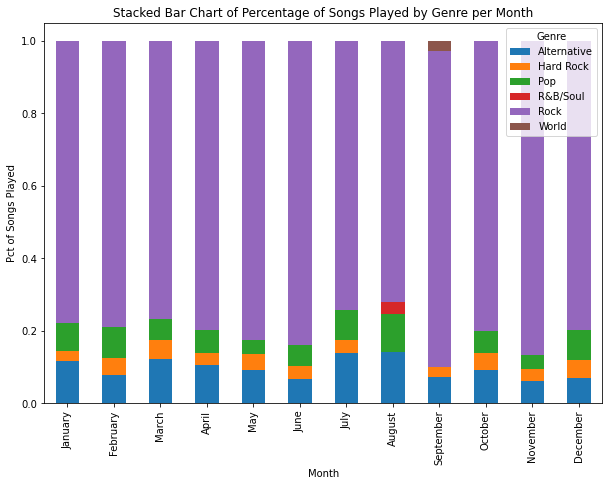

In [147]:
# Assuming that df is your DataFrame and it has columns 'start_month_num', 'Month', 'Pct of Songs Played' and 'Genre'
grouped = summ_df_a1_top3.groupby(['start_month_num', 'Month', 'Genre'])['Pct of Songs Played'].sum().unstack()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Stacked Bar Chart of Percentage of Songs Played by Genre per Month')
plt.xlabel('Month')
plt.ylabel('Pct of Songs Played')
plt.xticks(ticks=range(len(grouped.index)), labels=grouped.index.get_level_values(1), rotation=90)
plt.legend(title='Genre')
plt.show()

In [ ]:
# In general, my genre listening pattern is quite consistent month-to-month

In [21]:
# let's see if I tend to skip past rock songs more frequently than other genres
summ_df_b = summ_df[(summ_df['End Reason Type'] == 'NATURAL_END_OF_TRACK') |
                    (summ_df['End Reason Type'] == 'MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM') |
                    (summ_df['End Reason Type'] == 'TRACK_SKIPPED_FORWARDS')].groupby(['Genre']).agg(
                    Count = ('Count', 'sum'))

In [7]:
summ_df_b

,Count
Genre,
Alternative,708
Andean,6
Blues,57
Blues / Folk,5
CCM,9
Classic Rock,35
College Rock,19
Country,33
Dance,18


In [22]:
summ_df_b_stopped = summ_df[(summ_df['End Reason Type'] == 'MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM') |
                    (summ_df['End Reason Type'] == 'TRACK_SKIPPED_FORWARDS')].groupby(['Genre']).agg(
                    Count = ('Count', 'sum'))

In [9]:
summ_df_b_stopped.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Alternative to World
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   31 non-null     int64
dtypes: int64(1)
memory usage: 496.0+ bytes


In [23]:
summ_df_b = summ_df_b.join(summ_df_b_stopped, how='left', rsuffix='_stopped')

In [11]:
summ_df_b

,Count,Count_stopped
Genre,,
Alternative,708,199.0
Andean,6,4.0
Blues,57,32.0
Blues / Folk,5,NaN
CCM,9,8.0
Classic Rock,35,23.0
College Rock,19,10.0
Country,33,3.0
Dance,18,6.0


In [24]:
summ_df_b = summ_df_b.fillna(0)

In [25]:
summ_df_b['Pct of Plays Skipped'] = (summ_df_b['Count_stopped'] / summ_df_b['Count']) * 100

In [26]:
summ_df_b.sort_values('Pct of Plays Skipped', ascending=False)

,Count,Count_stopped,Pct of Plays Skipped
Genre,,,
Inspirational,9,8.0,88.888889
CCM,9,8.0,88.888889
Holiday,23,20.0,86.956522
Jazz,50,38.0,76.000000
Folk,94,63.0,67.021277
Andean,6,4.0,66.666667
Rap & Hip-Hop,6,4.0,66.666667
Classic Rock,35,23.0,65.714286
Electronica,46,29.0,63.043478


In [27]:
summ_df_b.reset_index(inplace=True)

In [16]:
summ_df_b[summ_df_b['Genre'].isin(['Rock', 'Alternative', 'Pop', 'R&B/Soul', 'World', 'Hard Rock'])]

,Genre,Count,Count_stopped,Pct of Plays Skipped
0,Alternative,708,199.0,0.281073
13,Hard Rock,228,33.0,0.144737
20,Pop,541,198.0,0.365989
23,R&B/Soul,129,26.0,0.201550
26,Rock,6041,1935.0,0.320311
36,World,166,79.0,0.475904


In [28]:
summ_df_b.columns = ['Genre', 'Plays', 'Plays Skipped', 'Pct of Plays Skipped']

In [29]:
summ_df_b['Plays Skipped'] = summ_df_b['Plays Skipped'].astype('int')

In [30]:
summ_df_b['Pct of Plays Skipped'] = summ_df_b['Pct of Plays Skipped'].round(3)

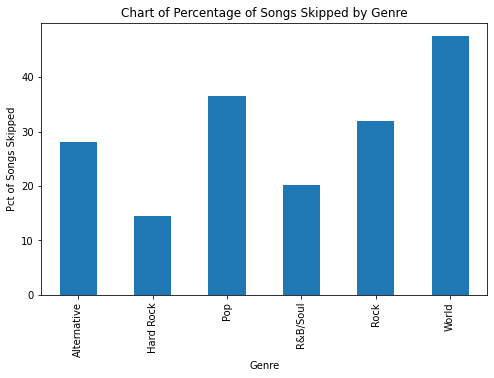

In [41]:
summ_df_b.loc[summ_df_b['Genre'].isin(['Rock', 'Alternative', 'Pop', 'R&B/Soul', 'World', 'Hard Rock']),
    ['Genre', 'Pct of Plays Skipped']].set_index('Genre') \
    .plot(kind='bar', figsize=(8,5), legend=False)
plt.title('Chart of Percentage of Songs Skipped by Genre')
plt.ylabel('Pct of Songs Skipped')
plt.show()

In [ ]:
# well, as it turns out, I do not skip over Rock or Alternative music more than Pop or World

In [52]:
# modify the path to your Media_Services/Stores Activity/Other Activity/App Store Click Activity.csv file in the line below
df = pd.read_csv('Apple/non_health/Media Services/Media_Services/Stores Activity/Other Activity/App Store Click Activity.csv',
                encoding='utf8')

In [ ]:
df

In [305]:
display(pd.DataFrame(df.columns))

,0
0,AB Test
1,Account Match
2,Action Context
3,Action Details
4,Action Type
5,Action URL
6,App
7,Apple ID Number
8,Application Name
9,AppStore Referral ID


In [306]:
len(df)

4349

In [ ]:
for col in df.columns:
    print('\nColumn: %s:'  % col, '\n', 
          'number of value count entries: %i:' % len(df[col].value_counts()), '\n\n',
        df[col].value_counts().head(10), '\n\n')

In [ ]:
df['Action Details'].value_counts()

In [317]:
df['Action Type'].value_counts()

input          479
stop            81
hint            79
open            72
buy             65
select          62
seek            48
play            43
submit          31
navigate        22
download        12
back             7
focus            7
update           5
buyInitiate      3
retry            3
cancel           2
didYouMean       2
filter           2
share            1
Name: Action Type, dtype: int64

In [ ]:
df['Action URL'].value_counts()

In [ ]:
df['Click Target'].value_counts()

In [321]:
df['Click Target Type'].value_counts()

key              598
button           215
listItem          79
tab               63
lockup             9
card               3
select_option      1
Name: Click Target Type, dtype: int64

In [322]:
df['Event Type'].value_counts()

redownload     1600
search          665
impressions     466
page            389
click           315
account         182
media           172
enter           166
exit            149
purchase        129
dialog           61
pageExit         50
update            5
Name: Event Type, dtype: int64

In [ ]:
df.loc[df['Event Type'] == 'search', ['Action Context',
'Action Details',
'Action Type', 
'Action URL',
'Click Target', 
'Click Target Type', 
'Event Type',
'External Referral App Name', 
'External Referral URL',
'Free App Adam ID',
'Free App Content ID', 
'Free App Developer ID', 
'Free App Genre',
'Free App Product Type', 
'Impressed Content Names', 
'IP City',
'Item Descriptions', 
'Location',
'Page',
'Page Context', 
'Page Custom ID', 
'Page Details',
'Page History',
'Page ID',
'Page Reason Type', 
'Page Type',
'Page URL',
'Page Variant ID', 
'Referral App Name', 
'Referral URL',
'Referring URL',
'Search Filters',
'Search Tab Term',
'Search Term']]

In [ ]:
df.loc[df['Event Type'] == 'impressions', ['Action Context',
'Action Details',
'Action Type', 
'Action URL',
'Click Target', 
'Click Target Type', 
'Event Type',
'External Referral App Name', 
'External Referral URL',
'Free App Adam ID',
'Free App Content ID', 
'Free App Developer ID', 
'Free App Genre',
'Free App Product Type', 
'Impressed Content Names', 
'IP City',
'Item Descriptions', 
'Location',
'Page',
'Page Context', 
'Page Custom ID', 
'Page Details',
'Page History',
'Page ID',
'Page Reason Type', 
'Page Type',
'Page URL',
'Page Variant ID', 
'Referral App Name', 
'Referral URL',
'Referring URL',
'Search Filters',
'Search Tab Term',
'Search Term']]

In [ ]:
df.loc[df['Event Type'] == 'purchase', ['Action Context',
'Action Details',
'Action Type', 
'Action URL',
'Click Target', 
'Click Target Type', 
'Event Type',
'External Referral App Name', 
'External Referral URL',
'Free App Adam ID',
'Free App Content ID', 
'Free App Developer ID', 
'Free App Genre',
'Free App Product Type', 
'Impressed Content Names', 
'IP City',
'Item Descriptions', 
'Location',
'Page',
'Page Context', 
'Page Custom ID', 
'Page Details',
'Page History',
'Page ID',
'Page Reason Type', 
'Page Type',
'Page URL',
'Page Variant ID', 
'Referral App Name', 
'Referral URL',
'Referring URL',
'Search Filters',
'Search Tab Term',
'Search Term']]

In [ ]:
df.loc[df['Event Type'] == 'dialog', ['Action Context',
'Action Details',
'Action Type', 
'Action URL',
'Click Target', 
'Click Target Type', 
'Event Type',
'External Referral App Name', 
'External Referral URL',
'Free App Adam ID',
'Free App Content ID', 
'Free App Developer ID', 
'Free App Genre',
'Free App Product Type', 
'Impressed Content Names', 
'IP City',
'Item Descriptions', 
'Location',
'Page',
'Page Context', 
'Page Custom ID', 
'Page Details',
'Page History',
'Page ID',
'Page Reason Type', 
'Page Type',
'Page URL',
'Page Variant ID', 
'Referral App Name', 
'Referral URL',
'Referring URL',
'Search Filters',
'Search Tab Term',
'Search Term']]

In [ ]:
df['Impressed Content Names'].value_counts()

In [333]:
len(df['Impressed Content Names'].value_counts())

631

In [334]:
df['Page Context'].value_counts()

Search       1603
Today         695
Discover       97
Sheet          35
transient      28
Music          24
Apps           18
Settings        9
Arcade          6
Main            5
Featured        4
standard        2
Name: Page Context, dtype: int64

In [ ]:
df['Page History'].value_counts()

In [336]:
len(df['Page History'].value_counts())

117

In [ ]:
df['Search Term'].value_counts()